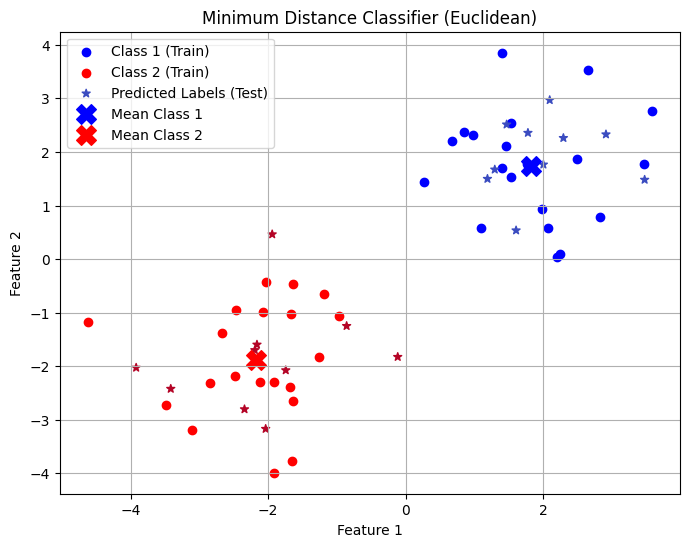

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


np.random.seed(42)
class1_train = np.random.randn(20, 2) + np.array([2, 2])
class2_train = np.random.randn(20, 2) + np.array([-2, -2])

class1_test = np.random.randn(10, 2) + np.array([2, 2])
class2_test = np.random.randn(10, 2) + np.array([-2, -2])


train_features = np.vstack((class1_train, class2_train))
train_labels = np.array([0] * 20 + [1] * 20)

test_features = np.vstack((class1_test, class2_test))
test_labels = np.array([0] * 10 + [1] * 10)

mean_class1 = np.mean(class1_train, axis=0)
mean_class2 = np.mean(class2_train, axis=0)

def classify_using_min_distance(test_data, mean1, mean2):
    predicted_labels = []
    for point in test_data:
        dist1 = np.linalg.norm(point - mean1)
        dist2 = np.linalg.norm(point - mean2)
        predicted_labels.append(0 if dist1 < dist2 else 1)
    return np.array(predicted_labels)

predicted_labels = classify_using_min_distance(test_features, mean_class1, mean_class2)


accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)
f1 = f1_score(test_labels, predicted_labels)

# Plot the data
plt.figure(figsize=(8, 6))


plt.scatter(class1_train[:, 0], class1_train[:, 1], color='blue', label='Class 1 (Train)')
plt.scatter(class2_train[:, 0], class2_train[:, 1], color='red', label='Class 2 (Train)')

plt.scatter(test_features[:, 0], test_features[:, 1], c=predicted_labels, cmap='coolwarm', marker='*', label="Predicted Labels (Test)")

plt.scatter(mean_class1[0], mean_class1[1], color='blue', marker='X', s=200, label="Mean Class 1")
plt.scatter(mean_class2[0], mean_class2[1], color='red', marker='X', s=200, label="Mean Class 2")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Minimum Distance Classifier (Euclidean)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
